In [243]:
#all imports
import pandas as pd
from numpy import nan
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm
import scipy.stats as stats
import statsmodels.api as sm
import math as m
from collections import defaultdict
from sklearn.linear_model import LogisticRegression

# In the begining we will "fill" the data

In [114]:
#upload the data
df = pd.read_csv("adult.csv")
df = df[["age", "workclass","education","educational-num", "marital-status", "occupation",
         "race", "gender", "hours-per-week", "native-country", "income"]]

In [115]:
#for now we will drop all missing values 
df = df.replace('?',nan)
num_of_nulls = df.isnull().sum()
no_null_df = df.dropna()
len_of_no_null_df = len(no_null_df)

In [116]:
# function for creating histogram for numerical variables, which also calculates the min, max, mean, and median values.
def make_numerical_hist(vec,xlabel, ylabel):
  plt.hist(vec)
  plt.title(f'Histogram num of {ylabel} per {xlabel}')
  plt.xlabel(xlabel)
  plt.ylabel(f'Num of {ylabel} ')
  plt.show()
  print(f'minimum value {int(vec.min())}', end=' \t')
  print(f'maximum value {int(vec.max())}', end='\t')
  print(f'meam value {vec.mean():.3f}', end='\t')
  print(f'median value {int(sorted(vec)[vec.shape[0]//2])}')

In [117]:
# function for creating histogram for categorial variables
def make_categorial_hist(df,xlabel):
    plt.figure(figsize=(25,5))
    total = float(len(df['income']))
    a = sns.countplot(x=xlabel,data=df)
    for f in a.patches:
        height = f.get_height()
        a.text(f.get_x() + f.get_width()/2., height+3, '{}'.format(height),ha="center")
    plt.ylabel('Num of People')
    plt.title(f'Histogram num of people per {xlabel}')
    plt.show()

In [118]:
# function for creating histogram for binary variables
def make_binary_hist(df,xlabel):
    plt.figure(figsize=(5,5))
    total = float(len(df['income']))
    a = sns.countplot(x=xlabel,data=df)
    for f in a.patches:
        height = f.get_height()
        a.text(f.get_x() + f.get_width()/2., height+3, '{}'.format(height),ha="center")
    plt.ylabel('Num of People')
    plt.title(f'Histogram num of people per {xlabel}')
    plt.show()

In [119]:
#calculate number of outliers for given field
def calc_outliers(field, df):
    # finding the 1st quartile
    q1 = np.quantile(df[field], 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(df[field], 0.75)
    med = np.median(df[field])
    # finding the iqr region
    iqr = q3-q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    buttom_outliers = df[field][(df[field] <= lower_bound)]
    top_outliers = df[field][(df[field] >= upper_bound)]
    outliers = df[field][(df[field] <= lower_bound) | (df[field] >= upper_bound)]
    num_of_outliers = len(outliers)
    print (f'upper bound whisker is: {upper_bound} \nlower bound whisker is: {lower_bound}\nnum of total outliers for {field}: {num_of_outliers}')

## In the cells below we will show the histograms and some statistics analyzing of our variables 

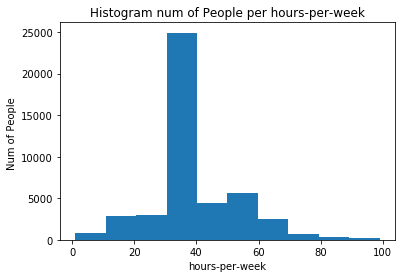

minimum value 1 	maximum value 99	meam value 40.938	median value 40


In [120]:
make_numerical_hist(no_null_df['hours-per-week'], 'hours-per-week', 'People')

In [121]:
calc_outliers('hours-per-week', no_null_df)

upper bound whisker is: 52.5 
lower bound whisker is: 32.5
num of total outliers for hours-per-week: 11899


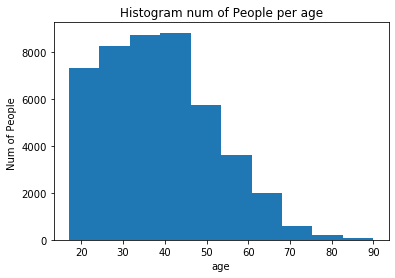

minimum value 17 	maximum value 90	meam value 38.548	median value 37


In [122]:
make_numerical_hist(no_null_df['age'], 'age', 'People')

In [123]:
calc_outliers('age', no_null_df)

upper bound whisker is: 75.5 
lower bound whisker is: -0.5
num of total outliers for age: 269


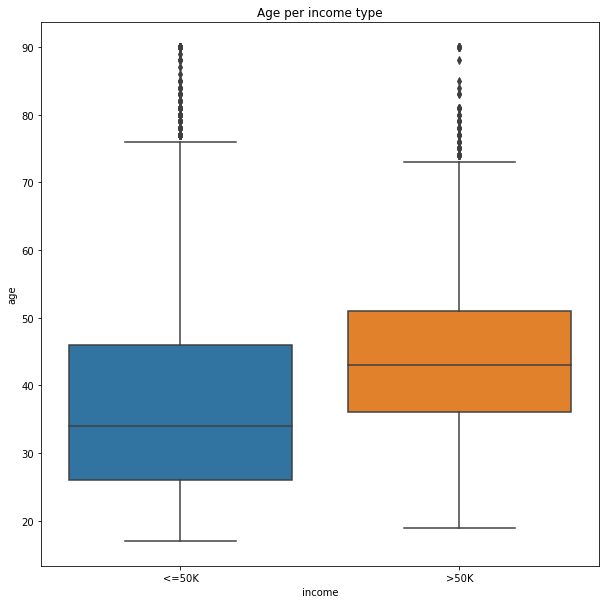

In [124]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=no_null_df)
plt.title('Age per income type')

plt.show()

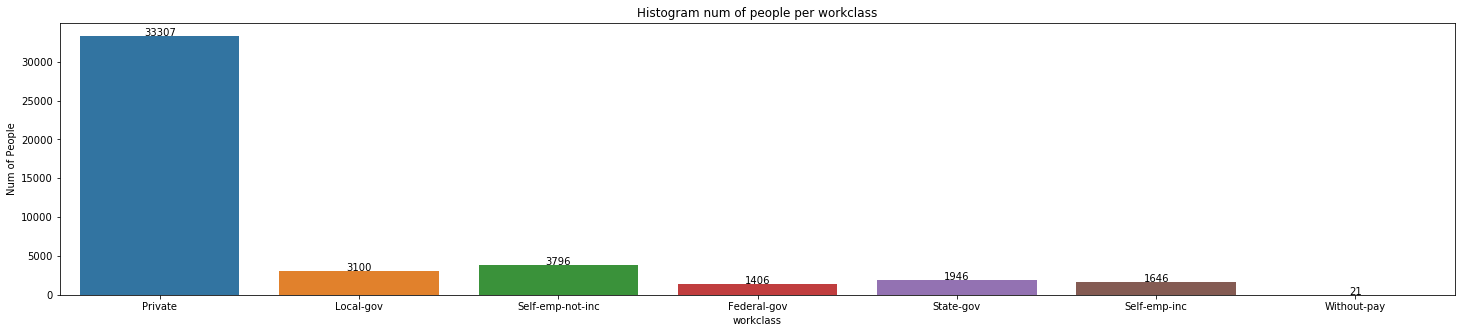

In [125]:
make_categorial_hist(no_null_df,'workclass')

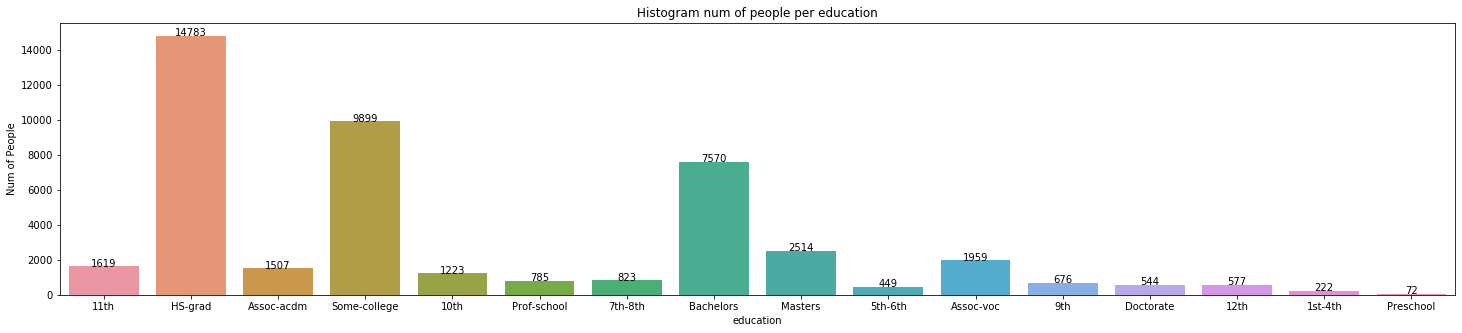

In [126]:
make_categorial_hist(no_null_df,'education')

In [127]:
# Creating a dictionary that contain the education and it's corresponding educational-num
edu_level = {}
for x,y in no_null_df[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x
sorted_edu_level = {k: v for k, v in sorted(edu_level.items(), key=lambda item: item[1])}
print(sorted_edu_level)

{'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16}


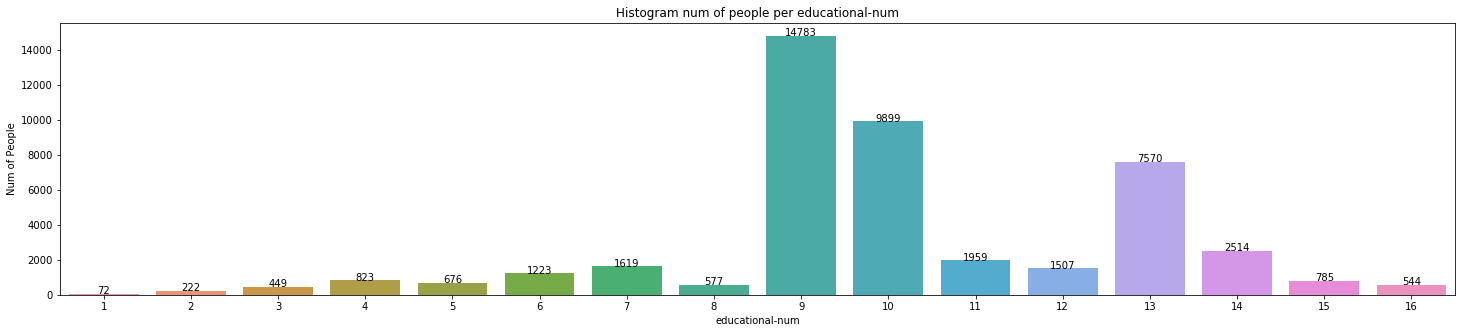

In [128]:
make_categorial_hist(no_null_df,'educational-num')

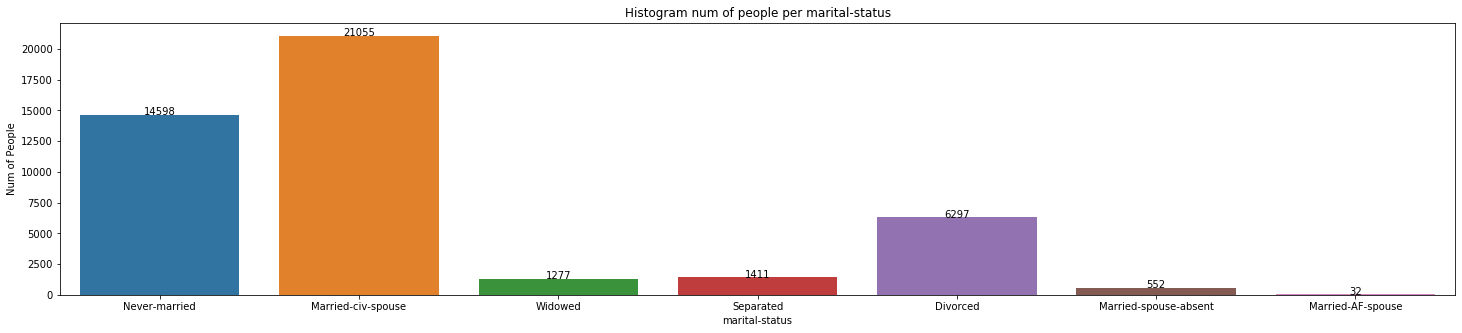

In [129]:
make_categorial_hist(no_null_df,'marital-status')

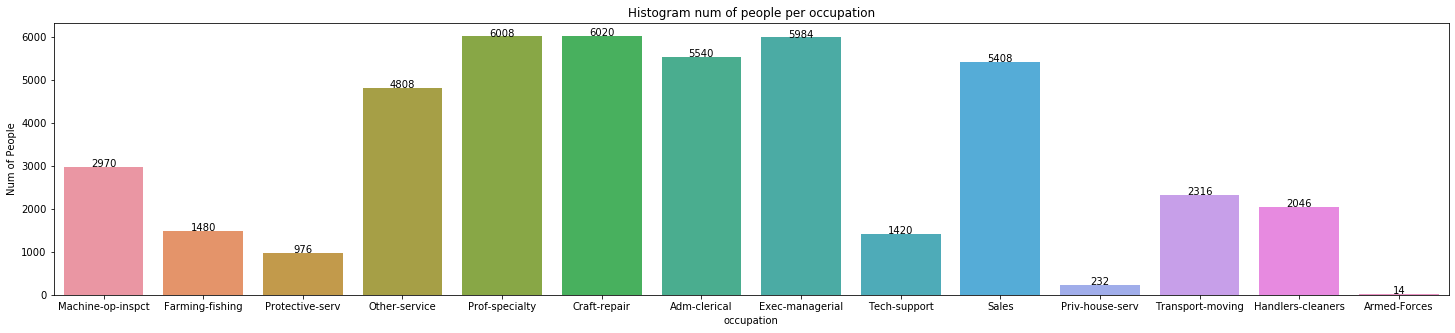

In [130]:
make_categorial_hist(no_null_df,'occupation')

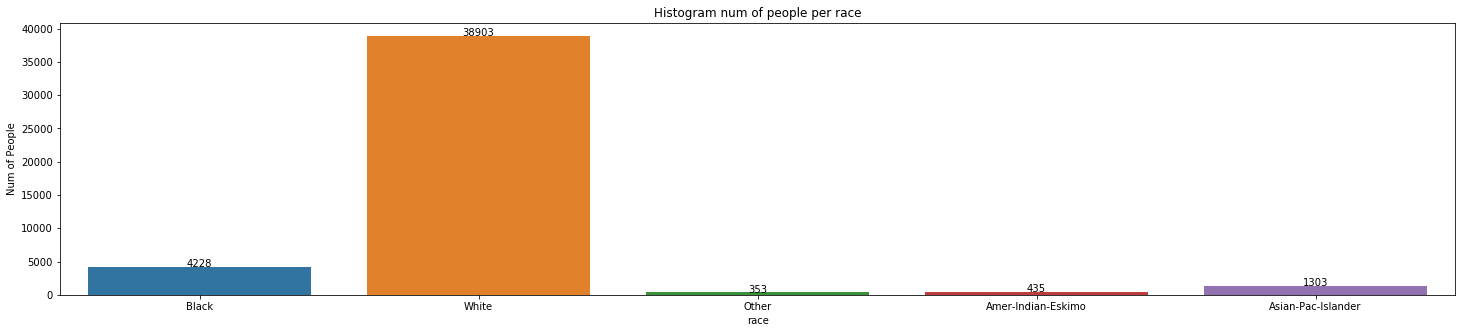

In [131]:
make_categorial_hist(no_null_df,'race')

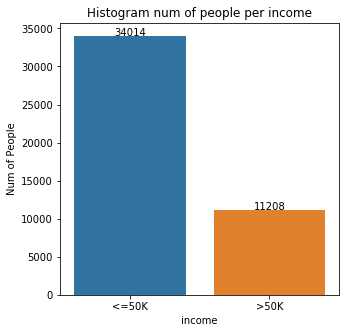

In [132]:
make_binary_hist(no_null_df,'income')

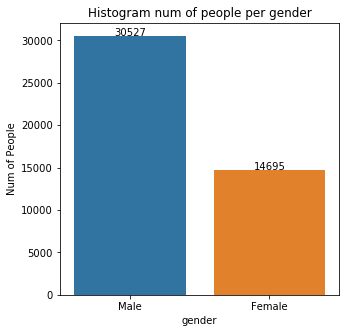

In [133]:
make_binary_hist(no_null_df,'gender')

In [134]:
native_country = no_null_df['native-country']
counts = no_null_df['native-country'].value_counts()
pd.DataFrame({'counts': counts})

,counts
United-States,41292
Mexico,903
Philippines,283
Germany,193
Puerto-Rico,175
Canada,163
India,147
El-Salvador,147
Cuba,133
England,119


# Now we will use just two columns for dipper analyzing 

In [135]:
tmp_df1 = no_null_df[["gender","hours-per-week"]]

In [136]:
#find the average for each of genders
avg = tmp_df1.groupby("gender")["hours-per-week"].mean()
display(avg)

gender
Female    36.932902
Male      42.865987
Name: hours-per-week, dtype: float64

In [137]:
#calculating statistical measures that we need 
gp = tmp_df1.groupby('gender')['hours-per-week']
result = gp.agg(['mean','std','count'])
display(result)

,mean,std,count
gender,,,
Female,36.932902,11.554959,14695
Male,42.865987,11.742173,30527


In [138]:
#calculating confidence interval 
result[('upper_ci')] = result[('mean')] + 1.96*np.divide(result[('std')], np.sqrt(result[('count')]))
result[('lower_ci')] = result[('mean')] - 1.96*np.divide(result[('std')], np.sqrt(result[('count')]))
display(result)

,mean,std,count,upper_ci,lower_ci
gender,,,,,
Female,36.932902,11.554959,14695,37.119729,36.746075
Male,42.865987,11.742173,30527,42.997711,42.734264


### Now we will check if the expectetion of hours per week is the same between males and females

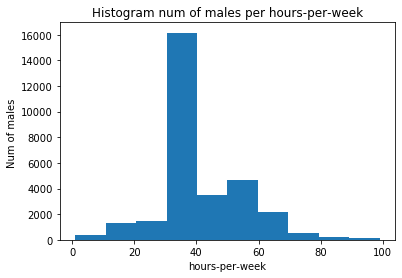

minimum value 1 	maximum value 99	meam value 42.866	median value 40


In [139]:
male_hours = tmp_df1[tmp_df1['gender']=='Male']['hours-per-week']
make_numerical_hist(male_hours, 'hours-per-week', 'males')

In [140]:
#function to check normality 
def check_normality(data):
    k2, p = stats.normaltest(data)
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [141]:
check_normality(male_hours)

p = 0
The null hypothesis can be rejected


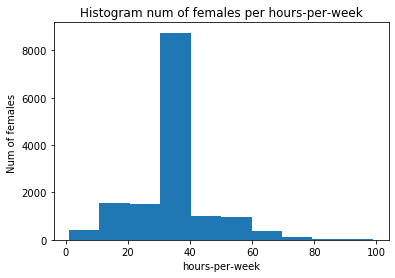

minimum value 1 	maximum value 99	meam value 36.933	median value 40


In [142]:
female_hours = tmp_df1[tmp_df1['gender']=='Female']['hours-per-week']
make_numerical_hist(female_hours, 'hours-per-week', 'females')

In [143]:
check_normality(female_hours)

p = 6.04219e-203
The null hypothesis can be rejected


#### As we can see from the test, hours per week for each gender isn't normal

In [144]:
# T_test
test_stat = (result['mean'][1]-result['mean'][0])/np.sqrt(result['std'][1]**2/result['count'][1]+result['std'][0]**2/result['count'][0])
N = result['count'][1] + result['count'][0]
alpha = 0.05
t_alpha_2 = t.ppf(1.0 - alpha/2, N)
p_val_t = (1.0 - t.cdf(abs(test_stat), N)) * 2.0
print(f"The statistic is {test_stat}")
print(f"The alpha/2 qauntile of T distrebution is {t_alpha_2}")
if test_stat > t_alpha_2:
    print("The null hypothesis can be rejected")
print(f"The p_value is {p_val_t}")

The statistic is 50.871116326562394
The alpha/2 qauntile of T distrebution is 1.9600164442642107
The null hypothesis can be rejected
The p_value is 0.0


In [145]:
#wald_test
W = (result['mean'][1]-result['mean'][0])/np.sqrt(result['std'][1]**2/result['count'][1]+result['std'][0]**2/result['count'][0])
alpha = 0.05
Z_alpha_2 = norm.ppf(1-alpha/2)
p_val_norm = (1.0 - norm.cdf(abs(W))) * 2.0
print(f"The statistic is {W}")
print(f"The alpha/2 qauntile of standard norm distrebution is {Z_alpha_2}")
if W > Z_alpha_2:
    print("The null hypothesis can be rejected")
print(f"The p_value is {p_val_norm}")

The statistic is 50.871116326562394
The alpha/2 qauntile of standard norm distrebution is 1.959963984540054
The null hypothesis can be rejected
The p_value is 0.0


#### In both tests we got the same test statistic and p_value, the quantilies are close becase t distrebution is similar to normal for more freedoms degree and we reject the null hypothesis.

In [146]:
# function for calculating the wald test for two independent samples
def independent_wald_test(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    W = (mean1 - mean2) / sed
    # calculate the critical value
    norm_alpha_2 = norm.ppf(1.0 - alpha/2)
    # calculate the p-value
    p_val = (1.0 - norm.cdf(abs(W))) * 2.0
    # return everything
    return W, p_val

In [147]:
#function for calculating confidence interval 
def calc_CI(df):
    gp = df.groupby('gender')['hours-per-week']
    result = gp.agg(['mean','std','count'])
    result[('upper_ci')] = result[('mean')] + 1.96*np.divide(result[('std')], np.sqrt(result[('count')]))
    result[('lower_ci')] = result[('mean')] - 1.96*np.divide(result[('std')], np.sqrt(result[('count')]))
    return result['lower_ci'][1], result['upper_ci'][1], result['lower_ci'][0], result['upper_ci'][0]

In [148]:
#we will look of our data as whole population and we will take a few diffeerent samples

sample_size = [30, 50, 100, 500]

male_lower_ci = {30:[],50:[],100:[],500:[]}
male_upper_ci = {30:[],50:[],100:[],500:[]}
female_lower_ci = {30:[],50:[],100:[],500:[]}
female_upper_ci = {30:[],50:[],100:[],500:[]}
p_val_dict = {30:[],50:[],100:[],500:[]}

for i in range (100):
    for size in sample_size:
        sample_df = tmp_df1.sample(size)
        male_lower, male_upper, female_lower, female_upper = calc_CI(sample_df)
        male_lower_ci[size].append(male_lower)
        male_upper_ci[size].append(male_upper)
        female_lower_ci[size].append(female_lower)
        female_upper_ci[size].append(female_upper)
        male_hours = sample_df[sample_df['gender']=='Male']['hours-per-week']
        female_hours = sample_df[sample_df['gender']=='Female']['hours-per-week']
        W, p_val = independent_wald_test(male_hours, female_hours, 0.05)
        p_val_dict[size].append(p_val)
        

In [149]:
#check the first CI that we get for each sample size to compare to CI that we have for all population

for size in sample_size:
    print(f"The CI for males in sample size {size} is [ {male_lower_ci[size][0]} , {male_upper_ci[size][0]} ] ")
    print(f"The CI for females in sample size {size} is [ {female_lower_ci[size][0]} , {female_upper_ci[size][0]} ] ")

The CI for males in sample size 30 is [ 38.67446696210736 , 52.26670950848087 ] 
The CI for females in sample size 30 is [ 30.48405773106139 , 41.05440380740014 ] 
The CI for males in sample size 50 is [ 38.3942475367839 , 45.37045834556904 ] 
The CI for females in sample size 50 is [ 30.461933560679604 , 41.038066439320396 ] 
The CI for males in sample size 100 is [ 40.48449894926706 , 44.71550105073294 ] 
The CI for females in sample size 100 is [ 32.78171549465324 , 39.88495117201343 ] 
The CI for males in sample size 500 is [ 42.18098086017612 , 44.63720095800569 ] 
The CI for females in sample size 500 is [ 34.55296441937594 , 38.18821205121229 ] 


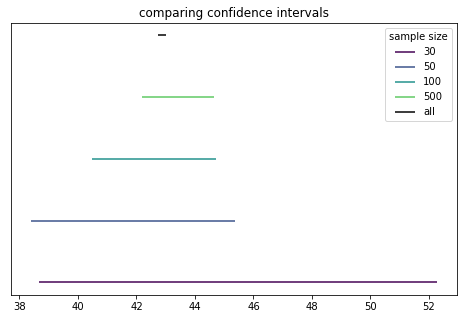

In [150]:
p = [(male_lower_ci[size][0],male_upper_ci[size][0]) for size in sample_size]

num_intervals = len(p)
viridis = plt.cm.get_cmap('viridis', num_intervals+1)

fig, ax = plt.subplots(figsize=(8,5))

for idx, (min_int, max_int) in enumerate(p):
  ax.hlines(y=idx, xmin=min_int, xmax=max_int, colors=viridis(idx / num_intervals), label=sample_size[idx])
ax.hlines(y=4, xmin=result["lower_ci"][1], xmax=result["upper_ci"][1], colors="black", label="all")
plt.title(f'comparing confidence intervals')
ax.legend(title="sample size")
plt.yticks([], [])
plt.show()

#### As the sample bigger the CI is smaller

In [151]:
#check the first p-value that we get for each sample size to compare to p-value that we have for all population

for size in sample_size:
    print(f"The p-value of Wald test for sample size {size} is {p_val_dict[size][0]}")  

The p-value of Wald test for sample size 30 is 0.0272014583217306
The p-value of Wald test for sample size 50 is 0.05778271882632979
The p-value of Wald test for sample size 100 is 0.0029665035492976166
The p-value of Wald test for sample size 500 is 3.197717646230558e-10


#### As the sample bigger the P_value is smaller

In [152]:
#hisotrams for several densities
def compare_hists(CI_lens_dict, gender, top):
    bins = np.linspace(0, top, 50)
    figure(figsize=(10,7),dpi=80)
    sizes = [30, 50, 100, 500]
    for size in sizes:
        plt.hist(CI_lens_dict[size], bins, alpha=0.5, label=size)
    plt.legend(loc='upper right', title="sample size")
    plt.title(f'Distrebutions for {gender}')
    plt.xlabel("CI_len")
    plt.ylabel("num of occurances")
    plt.show()

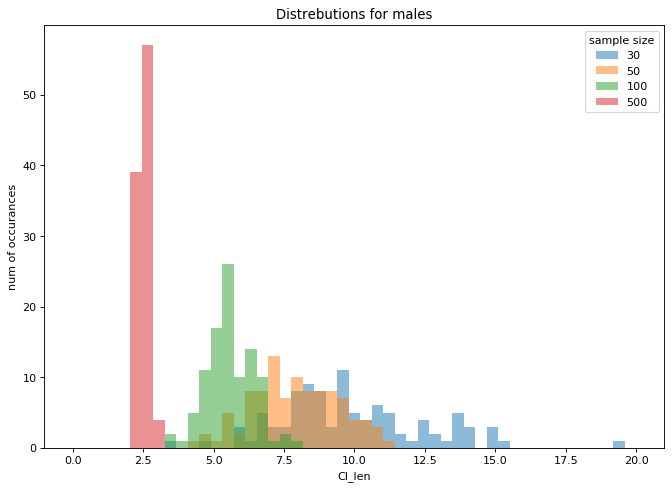

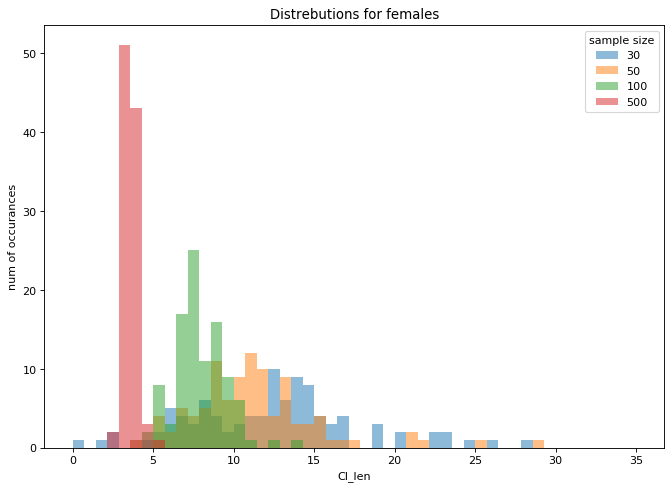

In [153]:
CI_lens_males = {30:[], 50:[], 100:[], 500:[]}
CI_lens_females = {30:[], 50:[], 100:[], 500:[]}

for size in sample_size:
    CI_lens_males[size] = [(male_upper_ci[size][i] - male_lower_ci[size][i]) for i in range(100)]
    CI_lens_females[size] = [(female_upper_ci[size][i] - female_lower_ci[size][i]) for i in range(100)]
compare_hists(CI_lens_males, "males", 20)
compare_hists(CI_lens_females, "females", 35)

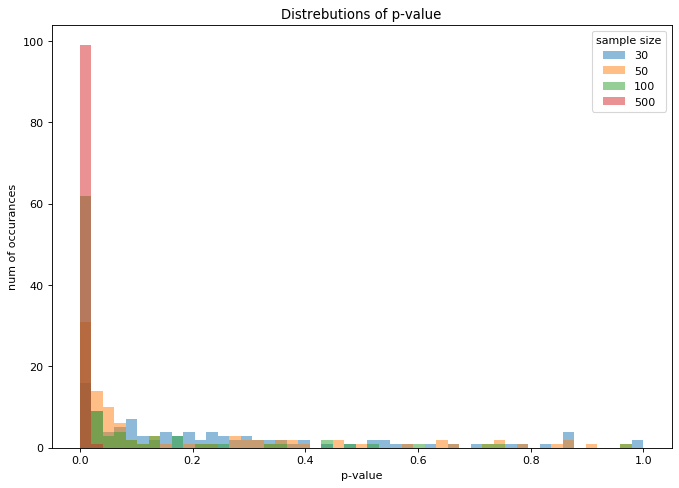

In [154]:
    bins = np.linspace(0, 1, 50)
    figure(figsize=(10,7),dpi=80)
    sizes = [30, 50, 100, 500]
    for size in sizes:
        plt.hist(p_val_dict[size], bins, alpha=0.5, label=size)
    plt.legend(loc='upper right', title="sample size")
    plt.title(f'Distrebutions of p-value')
    plt.xlabel("p-value")
    plt.ylabel("num of occurances")
    plt.show()

In [155]:
#what is the percentage that the expected value (the mean of all population) is in the CI for each sample size
sample_size = [30, 50, 100 , 500]
for size in sample_size: 
    male_percentage = len([[].append(1) for i in range(100) if (result['mean'][1]  > male_lower_ci[size][i] and result['mean'][1] < male_upper_ci[size][i])]) / 100
    female_percentage = len([[].append(1) for i in range(100) if (result['mean'][0]  > female_lower_ci[size][i] and result['mean'][0] < female_upper_ci[size][i])]) / 100
    print(f"The percentge that the mean for males inside the CI for sample size {size} is {male_percentage}")
    print(f"The percentge that the mean for females inside the CI for sample size {size} is {female_percentage}")

The percentge that the mean for males inside the CI for sample size 30 is 0.94
The percentge that the mean for females inside the CI for sample size 30 is 0.82
The percentge that the mean for males inside the CI for sample size 50 is 0.97
The percentge that the mean for females inside the CI for sample size 50 is 0.92
The percentge that the mean for males inside the CI for sample size 100 is 0.98
The percentge that the mean for females inside the CI for sample size 100 is 0.94
The percentge that the mean for males inside the CI for sample size 500 is 0.94
The percentge that the mean for females inside the CI for sample size 500 is 0.98


#### As we expected we got percentge near 0.95 because our alpha is 0.05

# linear regression

### For this part we will choose another subset of columns. 
### We want to check if the age, gender and income influence the number of hours per week

In [156]:
#chooce the columns that we need for this exercise 
tmp_df2 = no_null_df[["age", "gender", "income", "hours-per-week"]]

In [157]:
sample_df = tmp_df2.sample(n=200, random_state = 1)
sample_df

,age,gender,income,hours-per-week
42093,64,Female,<=50K,40
31739,56,Male,<=50K,40
10773,36,Male,<=50K,60
15850,19,Male,<=50K,37
40645,32,Male,>50K,45
...,...,...,...,...
1162,36,Male,<=50K,35
4978,38,Male,<=50K,42
46821,30,Male,<=50K,40
26123,46,Male,>50K,70


#### As we did in the begining we will shaw few histograms but now for the sample

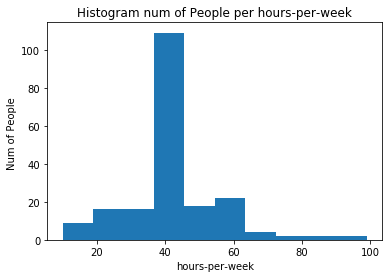

minimum value 10 	maximum value 99	meam value 41.915	median value 40


In [158]:
make_numerical_hist(sample_df['hours-per-week'], 'hours-per-week', 'People')

In [159]:
calc_outliers('hours-per-week', sample_df)

upper bound whisker is: 53.75 
lower bound whisker is: 31.75
num of total outliers for hours-per-week: 63


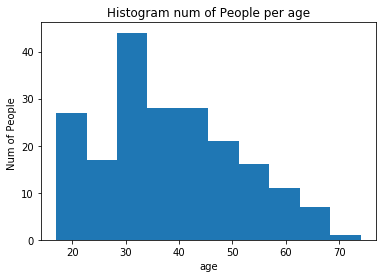

minimum value 17 	maximum value 74	meam value 38.110	median value 37


In [160]:
make_numerical_hist(sample_df['age'], 'age', 'People')

In [161]:
calc_outliers('age', sample_df)

upper bound whisker is: 73.5 
lower bound whisker is: 3.5
num of total outliers for age: 1


In [162]:
income = sample_df['income']
counts = sample_df['income'].value_counts()
pd.DataFrame({'counts': counts})

,counts
<=50K,147
>50K,53


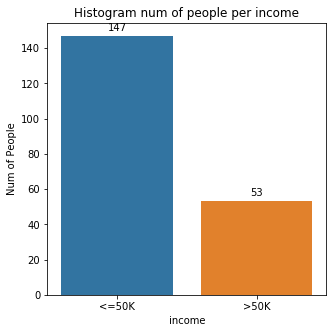

In [163]:
make_binary_hist(sample_df,'income')

In [164]:
gender = sample_df['gender']
counts = sample_df['gender'].value_counts()
pd.DataFrame({'counts': counts})

,counts
Male,129
Female,71


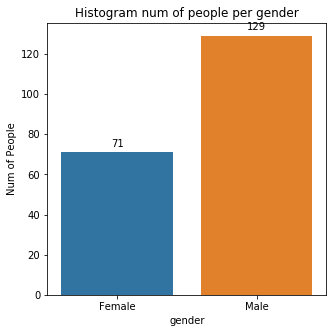

In [165]:
make_binary_hist(sample_df,'gender')

In [166]:
def create_scatter_plot(X, y, xlabel, ylabel):
    plt.scatter(X, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} as function of {xlabel}")

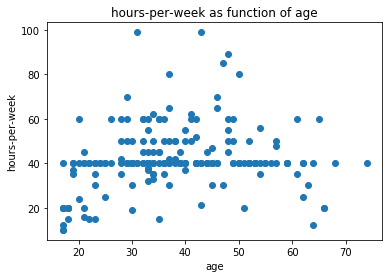

In [167]:
create_scatter_plot(sample_df["age"], sample_df["hours-per-week"], "age", "hours-per-week")

In [168]:
def create_boxplot_y_per_x(df, xlabel, ylabel):
    fig = plt.figure(figsize=(10,10)) 
    sns.boxplot(x=xlabel, y=ylabel, data=df)
    plt.title(f'{ylabel} per {xlabel} type')

    plt.show()

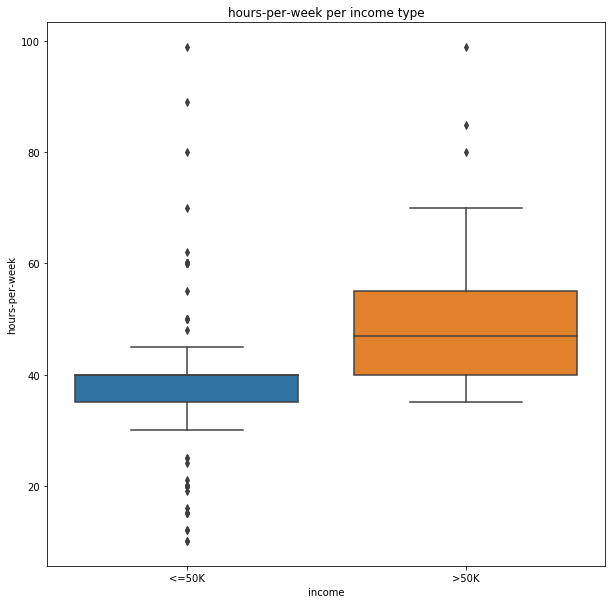

In [169]:
create_boxplot_y_per_x(sample_df, "income", "hours-per-week")

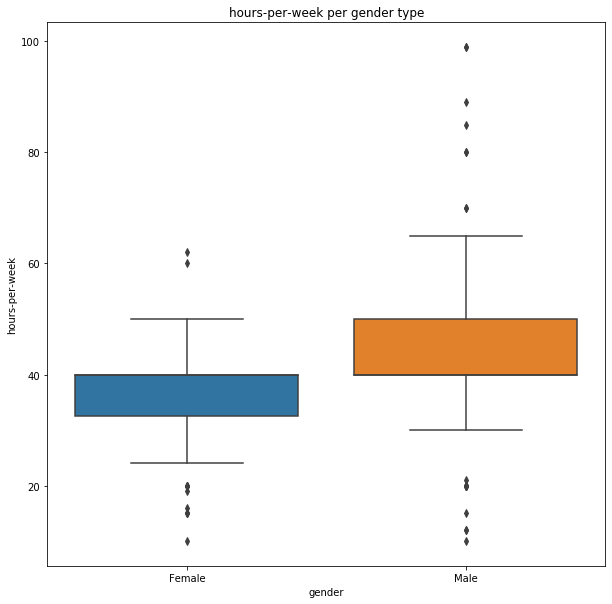

In [170]:
create_boxplot_y_per_x(sample_df, "gender", "hours-per-week")

In [171]:
#for calculating we transform binery variables to indicator
sample_df = pd.get_dummies(data=sample_df, drop_first=True)
sample_df = sample_df[["age", "gender_Male", "income_>50K", "hours-per-week"]]
sample_df

,age,gender_Male,income_>50K,hours-per-week
42093,64,0,0,40
31739,56,1,0,40
10773,36,1,0,60
15850,19,1,0,37
40645,32,1,1,45
...,...,...,...,...
1162,36,1,0,35
4978,38,1,0,42
46821,30,1,0,40
26123,46,1,1,70


In [172]:
#calculating beta_hat
X = sample_df.values[:,0:3]
o = np.ones(sample_df.shape[0])
X = np.vstack((o,X.T)).T
Y = sample_df.values[:,3]
beta_hat = (inv(X.T@X)@X.T)@Y
beta_hat

array([30.55347132,  0.1302711 ,  6.65845037,  7.93281776])

In [173]:
data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
SST = sum(np.square(Y-np.mean(Y)))
SSRES = sum(np.square(Y-(X@beta_hat)))
data.SS[2] = SST
data.SS[1] = SSRES
data.SS[0] = SST - SSRES
data.df = [X.shape[1]-1, X.shape[0]-X.shape[1],X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])
data.loc['Reg','P_value'] = p_val
data

,SS,df,MS,F_ratio,P_value
Reg,6889.65,3,2296.55,13.395,6.45742e-09
Res,33603.9,196,171.449,NaN,NaN
Total,40493.6,199,203.485,NaN,NaN


In [174]:
R_squered = 1 - (SSRES/SST)
R_squered

0.17014178846530315

In [175]:
R_adj_sqr = 1 - (data['MS'][1]/data['MS'][2])
R_adj_sqr

0.15743987706426177

#### Acording to F test we reject the null hypothesis, at least one of the elementa in beta isn't 0.

#### Now we will calculate CI for the beta and the "real" beta (of all data)

In [176]:
var_list = []
for i, beta in enumerate(beta_hat):
     var_list.append(data['MS'][1]*inv(X.T@X)[i][i])
CI_list = []
for i in range(4):
    CI_list.append([beta_hat[i]-2*np.sqrt(var_list[i]), beta_hat[i]+2*np.sqrt(var_list[i])])
CI_list

[[24.510342758917936, 36.59659988491482],
 [-0.017295820767994546, 0.2778380135002214],
 [2.624603774508813, 10.692296967901552],
 [3.5582457825212552, 12.307389735544895]]

In [177]:
#for calculating we transform binery variables to indicator
tmp_df2 = pd.get_dummies(data=tmp_df2, drop_first=True)
tmp_df2 = tmp_df2[["age", "gender_Male", "income_>50K", "hours-per-week"]]
tmp_df2

,age,gender_Male,income_>50K,hours-per-week
0,25,1,0,40
1,38,1,0,50
2,28,1,1,40
3,44,1,1,40
5,34,1,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,1,1,40
48839,58,0,0,40
48840,22,1,0,20


In [178]:
X_full = tmp_df2.values[:,0:3]
o_full = np.ones(tmp_df2.shape[0])
X_full = np.vstack((o_full,X_full.T)).T
Y_full = tmp_df2.values[:,3]
beta_hat_full = (inv(X_full.T@X_full)@X_full.T)@Y_full
beta_hat_full

array([34.87350975,  0.04068392,  4.86743597,  4.88402117])

#### We can see that all the "real" elementa in beta are in their CI

In [179]:
#check if beta_i equal to 0
check = []
for i, beta in enumerate(beta_hat):
    if abs(beta/np.sqrt(var_list[i])) > 2:
        check.append("reject")
    else:
        check.append("not reject")
check   

['reject', 'not reject', 'reject', 'reject']

Text(0, 0.5, 'Error')

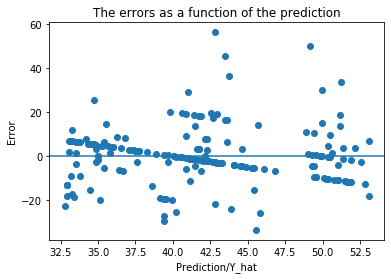

In [180]:
e = Y-X@beta_hat
plt.scatter(X@beta_hat, e)
plt.title('The errors as a function of the prediction')
plt.xlabel('Prediction/Y_hat')
plt.axhline(0)
plt.ylabel('Error')

#### Now we take another sample that not contains the first sample

In [181]:
new_df = tmp_df2.merge(sample_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
new_df = new_df[["age", "gender_Male", "income_>50K", "hours-per-week"]]
new_df = new_df.sample(n=1000, random_state = 1)
new_df

,age,gender_Male,income_>50K,hours-per-week
30497,53,1,1,40
42557,61,0,0,30
34061,21,0,0,20
42447,48,0,0,60
50003,41,0,1,55
...,...,...,...,...
45685,49,1,1,42
45233,34,1,1,48
44289,57,1,0,70
45769,39,1,0,24


#### We predict now the Y of the new points, and CI for the points. Then we want to check the percent of them that contains the real value of Y

In [182]:
X_new = new_df.values[:,0:3]
o_new = np.ones(new_df.shape[0])
X_new = np.vstack((o_new,X_new.T)).T
Y_new = new_df.values[:,3]
Y_new_hat = []
C = inv(X.T@X)
CI = []
for x in X_new:
    y_new_hat = beta_hat.T@x
    Y_new_hat.append(y_new_hat)
    ci = [y_new_hat - 2*np.sqrt(data['MS'][1]*(x.T@C@x + 1)), y_new_hat + 2*np.sqrt(data['MS'][1]*(x.T@C@x + 1))]
    CI.append(ci) 
check_list = []
for i, ci in enumerate(CI):
    if Y_new[i] >= ci[0] and Y_new[i] <= ci[1]:
        check_list.append(1)
correct_percent = sum(check_list)/1000
correct_percent

0.95

#### Now we add interactions 

In [183]:
interaction_df = sample_df
interaction_df["age-gender"] = interaction_df["age"]*interaction_df["gender_Male"]
interaction_df["age-income"] = interaction_df["age"]*interaction_df["income_>50K"]
interaction_df["gender-income"] = interaction_df["gender_Male"]*interaction_df["income_>50K"]
interaction_df = interaction_df[["age", "gender_Male", "income_>50K", "age-gender", "age-income", "gender-income", "hours-per-week"]]
interaction_df

,age,gender_Male,income_>50K,age-gender,age-income,gender-income,hours-per-week
42093,64,0,0,0,0,0,40
31739,56,1,0,56,0,0,40
10773,36,1,0,36,0,0,60
15850,19,1,0,19,0,0,37
40645,32,1,1,32,32,1,45
...,...,...,...,...,...,...,...
1162,36,1,0,36,0,0,35
4978,38,1,0,38,0,0,42
46821,30,1,0,30,0,0,40
26123,46,1,1,46,46,1,70


In [184]:
X_inter = interaction_df.values[:,0:6]
o_inter = np.ones(interaction_df.shape[0])
X_inter = np.vstack((o_inter,X_inter.T)).T
Y_inter = interaction_df.values[:,6]
beta_hat_inter = (inv(X_inter.T@X_inter)@X_inter.T)@Y_inter
beta_hat_inter

array([ 2.80087657e+01,  1.98588340e-01,  7.41806617e+00,  2.54705895e+01,
       -1.88623676e-02, -4.70397808e-01,  2.04436966e+00])

In [185]:
base_model = sm.OLS(Y, X)
base_result = base_model.fit()
print(base_result.summary())

inter_model = sm.OLS(Y_inter, X_inter)
inter_result = inter_model.fit()
print(inter_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     13.39
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           5.47e-08
Time:                        21:18:09   Log-Likelihood:                -796.20
No. Observations:                 200   AIC:                             1600.
Df Residuals:                     196   BIC:                             1614.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5535      3.022     10.112      0.0

#### After comparing both models we got that acording the AIC and BIC the second model (with interactions) is better

# Logistic regression

### We want to check, does age, hours per week and workclass affect the income

In [186]:
#chooce the columns that we need for this exercise 
tmp_df3 = no_null_df[["age","hours-per-week", "workclass", "income"]]
tmp_df3

,age,hours-per-week,workclass,income
0,25,40,Private,<=50K
1,38,50,Private,<=50K
2,28,40,Local-gov,>50K
3,44,40,Private,>50K
5,34,30,Private,<=50K
...,...,...,...,...
48837,27,38,Private,<=50K
48838,40,40,Private,>50K
48839,58,40,Private,<=50K
48840,22,20,Private,<=50K


In [187]:
sample_df1 = tmp_df3.sample(n=200, random_state = 1)
sample_df1

,age,hours-per-week,workclass,income
42093,64,40,Private,<=50K
31739,56,40,Private,<=50K
10773,36,60,Private,<=50K
15850,19,37,Private,<=50K
40645,32,45,Private,>50K
...,...,...,...,...
1162,36,35,Self-emp-not-inc,<=50K
4978,38,42,Private,<=50K
46821,30,40,Self-emp-not-inc,<=50K
26123,46,70,Self-emp-inc,>50K


In [188]:
workclass = sample_df1['workclass']
counts = sample_df1['workclass'].value_counts()
pd.DataFrame({'counts': counts})

,counts
Private,148
Self-emp-not-inc,18
Local-gov,13
Federal-gov,9
Self-emp-inc,8
State-gov,4


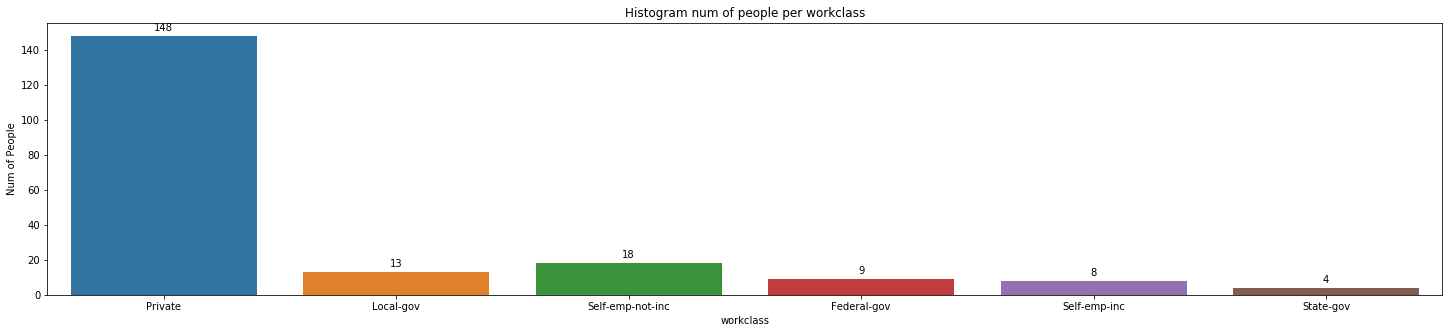

In [189]:
make_categorial_hist(sample_df1, 'workclass')

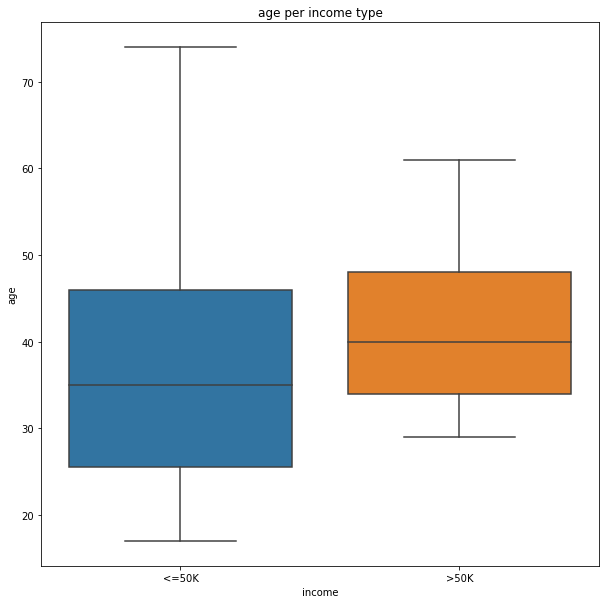

In [190]:
create_boxplot_y_per_x(sample_df1, "income", "age")

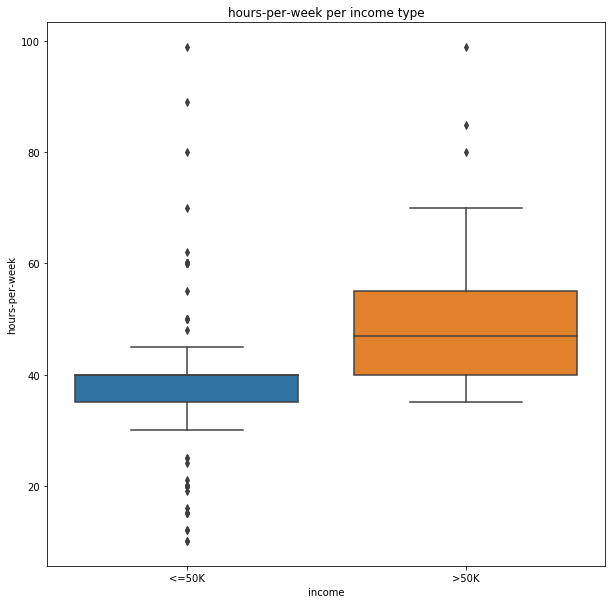

In [191]:
create_boxplot_y_per_x(sample_df1, "income", "hours-per-week")

In [192]:
#for calculating we transform binery variables to indicator
sample_df1 = pd.get_dummies(data=sample_df1, drop_first=True)
sample_df1

,age,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,income_>50K
42093,64,40,0,1,0,0,0,0
31739,56,40,0,1,0,0,0,0
10773,36,60,0,1,0,0,0,0
15850,19,37,0,1,0,0,0,0
40645,32,45,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1162,36,35,0,0,0,1,0,0
4978,38,42,0,1,0,0,0,0
46821,30,40,0,0,0,1,0,0
26123,46,70,0,0,1,0,0,1


#### For estimate beta we will use a function

In [193]:
X_logistic = sample_df1.values[:,0:7]
o_logistic = np.ones(sample_df1.shape[0])
X_logistic = np.vstack((o,X_logistic.T)).T
Y_logistic = sample_df1.values[:,7]

model = sm.Logit(Y_logistic, X_logistic)
result = model.fit(method = 'bfgs', maxiter =100)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505749
         Iterations: 55
         Function evaluations: 59
         Gradient evaluations: 59
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                            7
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.1253
Time:                        21:18:16   Log-Likelihood:                -101.15
converged:                       True   LL-Null:                       -115.64
Covariance Type:            nonrobust   LLR p-value:                 0.0001454
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6832      1.113     -

In [194]:
beta_hat_logistic = np.array([-3.682, 0.0238, 0.0565, -1.1381, -0.8216, -0.4171, -1.1193, 1.2397])

#### Calculate CI 

In [195]:
pi = []
for x in X_logistic:
    pi.append(m.exp(beta_hat_logistic.T@x)/(1+m.exp(beta_hat_logistic.T@x))*(1-m.exp(beta_hat_logistic.T@x)/(1+m.exp(beta_hat_logistic.T@x))))
V_hat = np.diag(pi)
var_list_logistic = []
for i, beta in enumerate(beta_hat_logistic):                
    var_list_logistic.append(inv(X_logistic.T@V_hat@X_logistic)[i][i])
CI_list_logistic = []
for i in range(8):
    CI_list_logistic.append([beta_hat_logistic[i]-2*np.sqrt(var_list_logistic[i]), beta_hat_logistic[i]+2*np.sqrt(var_list_logistic[i])])
CI_list_logistic    

[[-5.908045489306167, -1.4559545106938336],
 [-0.005977743350200092, 0.053577743350200095],
 [0.02810328056792503, 0.08489671943207497],
 [-3.1049125112715377, 0.8287125112715377],
 [-2.259659851795883, 0.6164598517958827],
 [-2.4684727407043208, 1.6342727407043207],
 [-2.9356509159494264, 0.6970509159494263],
 [-1.4695114448480364, 3.9489114448480365]]

In [196]:
tmp_df3 = pd.get_dummies(data=tmp_df3, drop_first=True)
tmp_df3

,age,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,income_>50K
0,25,40,0,1,0,0,0,0,0
1,38,50,0,1,0,0,0,0,0
2,28,40,1,0,0,0,0,0,1
3,44,40,0,1,0,0,0,0,1
5,34,30,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48837,27,38,0,1,0,0,0,0,0
48838,40,40,0,1,0,0,0,0,1
48839,58,40,0,1,0,0,0,0,0
48840,22,20,0,1,0,0,0,0,0


In [197]:
X_full_logistic = tmp_df3.values[:,0:7]
o_full_logistic = np.ones(tmp_df3.shape[0])
X_full_logistic = np.vstack((o_full_logistic,X_full_logistic.T)).T
Y_full_logistic = tmp_df3.values[:,7]

model = sm.Logit(Y_full_logistic, X_full_logistic)
result = model.fit(method = 'lbfgs', maxiter=100)

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45214
Method:                           MLE   Df Model:                            7
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.4413
Time:                        21:18:20   Log-Likelihood:                -101.78
converged:                       True   LL-Null:                       -182.17
Covariance Type:            nonrobust   LLR p-value:                 2.207e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5732      1.060     -2.427      0.015      -4.651      -0.495
x1             0.0255      0.016      1.641      0.101      -0.005       0.056
x2            -0.0724      0.019     -3.855      0.0

#### Now we check which of "real" beta's elements are in his CI

In [198]:
beta_hat_logistic_full = [-2.5732, 0.0255, -0.0724, -33.8741, -12.0019, -22.0402, -42.9776, -17.2390]
in_CI = []
for i, beta in enumerate(beta_hat_logistic_full):
    if beta >= CI_list_logistic[i][0] and beta <= CI_list_logistic[i][1]:
        in_CI.append('yes')
    else:
        in_CI.append('no')
in_CI

['yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no']

#### Now as we did in linear regression we will add interactions

In [199]:
interaction_df_logistic = sample_df1
interaction_df_logistic["age-hours-per-week"] = interaction_df_logistic["age"]*interaction_df_logistic["hours-per-week"]
interaction_df_logistic["age-workclass_Local-gov"] = interaction_df_logistic["age"]*interaction_df_logistic["workclass_Local-gov"]
interaction_df_logistic["age-workclass_Private"] = interaction_df_logistic["age"]*interaction_df_logistic["workclass_Private"]
interaction_df_logistic["age-workclass_Self-emp-inc"] = interaction_df_logistic["age"]*interaction_df_logistic["workclass_Self-emp-inc"]
interaction_df_logistic["age-workclass_Self-emp-not-inc"] = interaction_df_logistic["age"]*interaction_df_logistic["workclass_Self-emp-not-inc"]
interaction_df_logistic["age-workclass_State-gov"] = interaction_df_logistic["age"]*interaction_df_logistic["workclass_State-gov"]

interaction_df_logistic["hours-per-week-workclass_Local-gov"] = interaction_df_logistic["hours-per-week"]*interaction_df_logistic["workclass_Local-gov"]
interaction_df_logistic["hours-per-week-workclass_Private"] = interaction_df_logistic["hours-per-week"]*interaction_df_logistic["workclass_Private"]
interaction_df_logistic["hours-per-week-workclass_Self-emp-inc"] = interaction_df_logistic["hours-per-week"]*interaction_df_logistic["workclass_Self-emp-inc"]
interaction_df_logistic["hours-per-week-workclass_Self-emp-not-inc"] = interaction_df_logistic["hours-per-week"]*interaction_df_logistic["workclass_Self-emp-not-inc"]
interaction_df_logistic["hours-per-week-workclass_State-gov"] = interaction_df_logistic["hours-per-week"]*interaction_df_logistic["workclass_State-gov"]


interaction_df_logistic = interaction_df_logistic[["age", "hours-per-week", "workclass_Local-gov", "workclass_Private","workclass_Self-emp-inc", "workclass_Self-emp-not-inc",  "workclass_State-gov", "age-hours-per-week", "age-workclass_Local-gov", "age-workclass_Private", "age-workclass_Self-emp-inc", "age-workclass_Self-emp-not-inc", "age-workclass_State-gov", "hours-per-week-workclass_Local-gov", "hours-per-week-workclass_Private", "hours-per-week-workclass_Self-emp-inc", "hours-per-week-workclass_Self-emp-not-inc", "hours-per-week-workclass_State-gov", "income_>50K"]]
interaction_df_logistic

,age,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,age-hours-per-week,age-workclass_Local-gov,age-workclass_Private,age-workclass_Self-emp-inc,age-workclass_Self-emp-not-inc,age-workclass_State-gov,hours-per-week-workclass_Local-gov,hours-per-week-workclass_Private,hours-per-week-workclass_Self-emp-inc,hours-per-week-workclass_Self-emp-not-inc,hours-per-week-workclass_State-gov,income_>50K
42093,64,40,0,1,0,0,0,2560,0,64,0,0,0,0,40,0,0,0,0
31739,56,40,0,1,0,0,0,2240,0,56,0,0,0,0,40,0,0,0,0
10773,36,60,0,1,0,0,0,2160,0,36,0,0,0,0,60,0,0,0,0
15850,19,37,0,1,0,0,0,703,0,19,0,0,0,0,37,0,0,0,0
40645,32,45,0,1,0,0,0,1440,0,32,0,0,0,0,45,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,36,35,0,0,0,1,0,1260,0,0,0,36,0,0,0,0,35,0,0
4978,38,42,0,1,0,0,0,1596,0,38,0,0,0,0,42,0,0,0,0
46821,30,40,0,0,0,1,0,1200,0,0,0,30,0,0,0,0,40,0,0
26123,46,70,0,0,1,0,0,3220,0,0,46,0,0,0,0,70,0,0,1


In [200]:
X_logistic_inter = interaction_df_logistic.values[:,0:18]
o_logistic_inter = np.ones(interaction_df_logistic.shape[0])
X_logistic_inter = np.vstack((o_logistic_inter,X_logistic_inter.T)).T
Y_logistic_inter = interaction_df_logistic.values[:,18]

model = sm.Logit(Y_logistic_inter, X_logistic_inter)
result = model.fit(method = 'ncg', maxiter=100)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.645658
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                           18
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                 -0.1166
Time:                        21:18:22   Log-Likelihood:                -129.13
converged:                       True   LL-Null:                       -115.64
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [201]:
#compare BIC

BIC_base = -101.15 - (7/2)*m.log(200)
BIC_inter = -115.64 - (18/2)*m.log(200)

if BIC_base > BIC_inter:
    print("It's better without interaction")
else:
    print("It's better with interaction")

It's better without interaction


# Bootstrap

### In the next part we will use the same sample that we use in the linear regression part and we will see few ways for calculating CI with bootstrap

In [202]:
#create a statistics sample based on bootstrap 
T_n_list = []
for i in range (400):
    tmp_sample = sample_df.sample(n=200, replace=True, random_state = i+1)
    X = tmp_sample.values[:,0:3]
    o = np.ones(tmp_sample.shape[0])
    X = np.vstack((o,X.T)).T
    Y = tmp_sample.values[:,3]
    beta_hat = (inv(X.T@X)@X.T)@Y
    T_n_list.append(beta_hat)
T_n_list = np.array(T_n_list)

In [203]:
# CI using bootstrap estimation for S.E.
CI_list_norm_boot = []
for i in range(len(beta_hat)):
    beta_i = T_n_list[:,i]
    var_T_i = np.mean(beta_i**2) - np.mean(beta_i)**2
    CI_list_norm_boot.append([beta_hat[i]-2*np.sqrt(var_T_i), beta_hat[i]+2*np.sqrt(var_T_i)])
CI_list_norm_boot

[[24.303125397224896, 37.206452274828216],
 [-0.019346767787002256, 0.315027086649606],
 [5.1622960594281135, 12.520412358273676],
 [1.2567943392998, 10.169731406025889]]

In [204]:
#CI using pivot
CI_pivot = []
for i in range(len(beta_hat)):
    x_new = sorted(T_n_list[:,i], reverse = False)
    CI_pivot.append([2*beta_hat[i] - x_new[390], 2*beta_hat[i] - x_new[10]])
CI_pivot

[[24.40883714102977, 37.318849950698734],
 [-0.009520683991765144, 0.32470419849832766],
 [7.310812837304571, 14.314138238977336],
 [-1.352702880251055, 7.204898807420847]]

In [209]:
# CI using quantiles
CI_quantiles = []
for i in range(len(beta_hat)):
    x_new = sorted(T_n_list[:,i], reverse = False)
    CI_quantiles.append([x_new[10], x_new[390]])
CI_quantiles

[[24.190727721354378, 37.10074053102334],
 [-0.029023879635723886, 0.3052010028543689],
 [3.3685701787244544, 10.371895580397219],
 [4.221626937904842, 12.779228625576744]]

#### We want to compare the our first method to CI (that we use in linear regression part) and the 3 with bootstrap

In [210]:
CIs_dict ={"COV_matrix": CI_list, "bootstrap s.e.": CI_list_norm_boot, "bootstrap pivot": CI_pivot, "bootstrap quantiles": CI_quantiles}

#dict to calculate the len of the CI
len_dict = defaultdict(list)
for i in range(len(beta_hat)):
    for key in CIs_dict.keys():
        len_dict[key].append(CIs_dict[key][i][1] - CIs_dict[key][i][0])

In [211]:
#dict to check if the real value of beta_hat is the CI
in_out_dict = defaultdict(list)
for i in range(len(beta_hat_full)):
    for key in CIs_dict.keys():
        if beta_hat_full[i] >= CIs_dict[key][i][0] and beta_hat_full[i] <= CIs_dict[key][i][1]:
            in_out_dict[key].append('in')
        else:
            in_out_dict[key].append('out')
in_out_dict

defaultdict(list,
            {'COV_matrix': ['in', 'in', 'in', 'in'],
             'bootstrap s.e.': ['in', 'in', 'out', 'in'],
             'bootstrap pivot': ['in', 'in', 'out', 'in'],
             'bootstrap quantiles': ['in', 'in', 'in', 'in']})

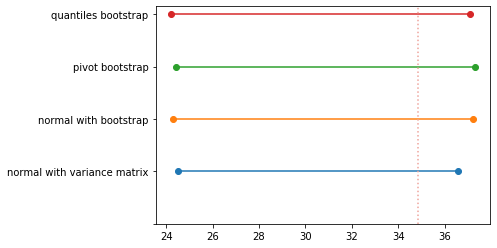

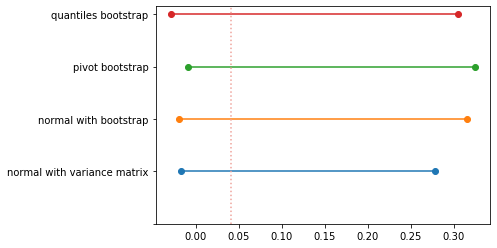

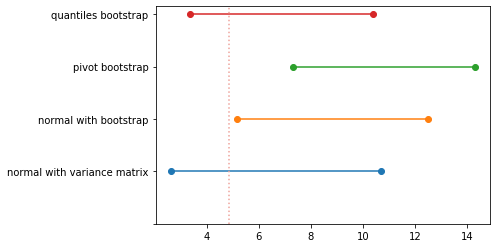

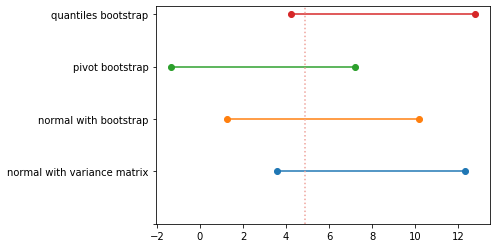

In [212]:
ticks=['','normal with variance matrix', 'normal with bootstrap', 'pivot bootstrap', 'quantiles bootstrap']
CI = [CI_list, CI_list_norm_boot, CI_pivot, CI_quantiles]
for i in range(4):
    for j in range(4):
        plt.plot((CI[j][i][0],CI[j][i][1]),(j+1,j+1),'o-')
    plt.yticks(range(len(ticks)),ticks)
    plt.axvline(beta_hat_full[i], color='#eea29a', linestyle='dotted')
    plt.show()

In [214]:
# Now we create a sample that dont contains the 200 rows from first sample
new_sample = new_df.sample(n=100, random_state = 1)
new_sample

,age,gender_Male,income_>50K,hours-per-week
17035,28,0,0,40
46979,37,1,1,44
33661,18,0,0,40
8066,34,1,0,40
42541,47,0,0,42
...,...,...,...,...
43117,37,1,1,45
29918,30,1,1,40
23924,39,1,0,55
48316,46,0,0,43


In [216]:
# Predict Y_hat for new points
X_new1 = new_sample.values[:,0:3]
o_new1 = np.ones(new_sample.shape[0])
X_new1 = np.vstack((o_new1, X_new1.T)).T
Y_new1 = new_sample.values[:,3]
Y_new_hat1 = []
for x in X_new1:
    y_new_hat1 = beta_hat.T@x
    Y_new_hat1.append(y_new_hat1)

#### We will create a CI for the expectetion of the Y_new and check if Y_new in the CI. The method that we will use is the quantiles bootstrap

In [217]:
predictions = []
for i in range (400):
    tmp_sample = sample_df.sample(n=200, replace=True, random_state = i+1)
    X_boot = tmp_sample.values[:,0:3]
    o_boot = np.ones(tmp_sample.shape[0])
    X_boot = np.vstack((o_boot,X_boot.T)).T
    Y_boot = tmp_sample.values[:,3]
    beta_hat_boot = (inv(X_boot.T@X_boot)@X_boot.T)@Y_boot
    Y_hat_boot = []
    CI = []
    for x in X_new:
        y_hat = beta_hat_boot.T@x
        Y_hat_boot.append(y_hat)
    predictions.append(Y_hat_boot)   
predictions = np.array(predictions)

expected_CI_quantiles = []
check_list1 = []
for i in range(100):
    pred = np.sort(predictions[:,i])
    ci = [pred[10], pred[390]]
    expected_CI_quantiles.append(ci)
    if Y_new[i] >= ci[0] and Y_new[i] <= ci[1]:
        check_list1.append(1)
correct_percent = sum(check_list1)/100
correct_percent    

0.24

#### We got a very small percent and we expect 0.95. The reason maight be, because we calculate the CI for the expectetion and after that chaeck for the prediction of the point and not for the expectetion.

# Tests

### We want to check if the hours per week for females is stochastic smaller than for males

In [219]:
#chooce the columns that we need for this exercise 
tmp_df4 = tmp_df2[["gender_Male", "hours-per-week"]]
sample_df2 = tmp_df4.sample(n=200, random_state = 10)
sample_df2

,gender_Male,hours-per-week
43044,1,40
39222,1,45
4896,0,40
4438,1,40
45008,1,40
...,...,...
24327,1,50
27231,0,40
13553,1,40
13902,0,35


In [220]:
male_hours1 = sample_df2[sample_df2['gender_Male']==1]['hours-per-week']
female_hours1 = sample_df2[sample_df2['gender_Male']==0]['hours-per-week']

#### First we will check the difference betwwen the means

In [221]:
sample_df2.groupby("gender_Male").agg({"hours-per-week": [np.mean, np.std, np.size]})

hours-per-week                
                      mean        std size
gender_Male                               
0                37.588235  12.583139   68
1                40.871212  11.391309  132

c:\users\chany\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chany\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


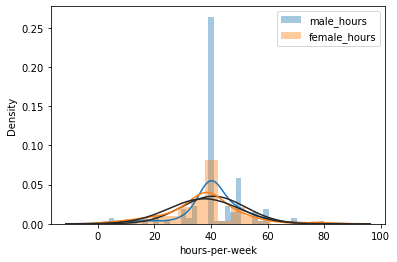

In [225]:
mu1_hat = np.mean(male_hours1)
mu2_hat = np.mean(female_hours1)
se_male_hat = np.std(male_hours1)
se_female_hat = np.std(female_hours1)
sample_male_size = np.size(male_hours1)
sample_female_size = np.size(female_hours1)
delta_est = mu1_hat-mu2_hat

sns.distplot(male_hours1, fit = stats.norm, label='male_hours')
sns.distplot(female_hours1, fit = stats.norm, label ='female_hours')
plt.legend()

In [226]:
# CI for delta
sem_d = (np.sqrt((se_male_hat**2)/(sample_male_size))*((se_female_hat**2)/(sample_female_size)))
lcb = delta_est - 1.96*sem_d  #lower limit of the CI
ucb = delta_est + 1.96*sem_d  #upper limit of the CI
(lcb, ucb)

(-1.1584893477901996, 7.724443001979159)

In [227]:
population_stats = tmp_df4.groupby("gender_Male").agg({"hours-per-week": [np.mean, np.std, np.size]})
population_stats

hours-per-week                  
                      mean        std   size
gender_Male                                 
0                36.932902  11.554959  14695
1                42.865987  11.742173  30527

In [228]:
male_hours_pop = tmp_df4[tmp_df4['gender_Male']==1]['hours-per-week']
female_hours_pop = tmp_df4[tmp_df4['gender_Male']==0]['hours-per-week']

male_mean_pop = np.mean(male_hours_pop)
female_mean_pop = np.mean(female_hours_pop)
se_male_pop = np.std(male_hours_pop)
se_female_pop = np.std(female_hours_pop)
male_size = np.size(male_hours_pop)
female_size = np.size(female_hours_pop)
delta_pop_est = male_mean_pop-female_mean_pop
delta_pop_est

5.9330851387500445

#### We got that the "real" delta is in the CI

### Now we will do a permutetion test and after this a wald test 

In [232]:
total_hours = np.array(list(male_hours1) + list(female_hours1))

def simulate_difference(values, groupA_len):
    randomly_shuffled = np.random.permutation(values)
    groupA_mean = randomly_shuffled[:groupA_len].mean()
    groupB_mean = randomly_shuffled[groupA_len:].mean()
    return abs(groupA_mean - groupB_mean)

num_simulations = 1000

simulated_results =  []

for _ in range(num_simulations):
    simulated_results.append(simulate_difference(total_hours, len(male_hours1)))    
simulated_results = np.array(simulated_results)

observed_difference = delta_est

alpha = 0.05

simulations_at_least_as_extreme = sum(
    simulated_results >= observed_difference
)

num_simulations = simulated_results.shape[0]
p_value = simulations_at_least_as_extreme / num_simulations

if (p_value < alpha):
  print("\033[1m" + 'according to the permutations test we reject the null hypothesis' +  "\033[0m")
else:
    print('according to the permutations test we not reject the null hypothesis')

according to the permutations test we not reject the null hypothesis


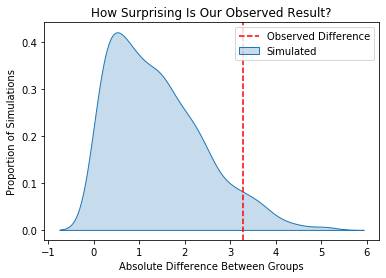

In [230]:
# Plot permutation simulations
density_plot = sns.kdeplot(simulated_results, shade=True)
density_plot.set(
    xlabel='Absolute Difference Between Groups',
    ylabel='Proportion of Simulations',
    title='How Surprising Is Our Observed Result?'
)

# Add a line to show the actual difference observed in the data
density_plot.axvline(
    x=observed_difference, 
    color='red', 
    linestyle='--'
)

plt.legend(
    labels=['Observed Difference', 'Simulated'], 

    loc='upper right'
)
plt.show()

In [231]:
#wald_test
W = (mu1_hat-mu2_hat)/np.sqrt(se_male_hat**2/sample_male_size+se_female_hat**2/sample_female_size)
alpha = 0.05
Z_alpha = norm.ppf(1-alpha)
p_val_norm = (1.0 - norm.cdf(W)) 
print(f"The statistic is {W}")
print(f"The alpha qauntile of standard norm distrebution is {Z_alpha}")
if W > Z_alpha:
    print("\033[1m" + "The null hypothesis can be rejected" "\033[0m")
print(f"The p_value is {p_val_norm}")

The statistic is 1.8155411628614995
The alpha qauntile of standard norm distrebution is 1.6448536269514722
The null hypothesis can be rejected
The p_value is 0.034720393082473544


#### We got that acording to permutation test we not reject the null hypothesis (and the hours are the same) and acording to wald test we reject the null hypothesis (and the hours for females are smaller)

#### Now we will do a permutation test to median difference

In [235]:
male_hours_median = np.median(male_hours1)
female_hours_median = np.median(female_hours1)
delta_median = male_hours_median - female_hours_median
print(f'male_hours_median is {male_hours_median} and female_hours_median equals to {female_hours_median} , delta equals to:{delta_median}.')

median1_list, median2_list = [], []

#we caculate a CI using bootstrap estimation to the S.E.
B = 400
sum_squre, sum1 = 0,0
for i in range(B):
    sample_median1 = np.median(male_hours1.sample(sample_male_size, replace = True))
    sample_median2 = np.median(female_hours1.sample(sample_female_size, replace = True))
    sample_delta = sample_median1 - sample_median2
    sum_squre += (pow(sample_delta,2))/B
    sum1 += sample_delta/B
sum1 = pow(sum1,2)
var = sum_squre - sum1
upper = delta_median + 1.96*np.sqrt(var)
lower = delta_median - 1.96*np.sqrt(var)
delta_median_CI = (lower, upper)
print("The CI for median difference is: "+str(delta_median_CI)+'.')

male_hours_median is 40.0 and female_hours_median equals to 40.0 , delta equals to:0.0.
The CI for median difference is: (-2.112689991456389, 2.112689991456389).


In [236]:
alldata_median_males = male_hours_pop.median()
alldata_median_females = female_hours_pop.median()
alldata_median_delta = alldata_median_males - alldata_median_females
alldata_median_delta

0.0

#### The "real" delta is in the CI

In [239]:
simulated_median_results =  []

def simulate_median_difference(values, groupA_len):
    randomly_shuffled = np.random.permutation(values)
    groupA_median = np.median(randomly_shuffled[:groupA_len])
    groupB_median = np.median(randomly_shuffled[groupA_len:])
    return abs(groupA_median - groupB_median)

for _ in range(num_simulations):
    simulated_median_results.append(simulate_median_difference(total_hours, len(male_hours1)))    
simulated_medians_results = np.array(simulated_median_results)

observed_median_difference = delta_median

simulations_median = sum(np.array(simulated_medians_results) >= observed_median_difference)

num_simulations = simulated_results.shape[0]
p_value = simulations_median / num_simulations

print(p_value)

if (p_value < alpha):
    print("\033[1m" + 'according to the permutations test we reject the null hypothesis' +  "\033[0m")
else:
    print('according to the permutations test we not reject the null hypothesis')

1.0
according to the permutations test we not reject the null hypothesis


### Now we will do 2 Wilcoxon tests, the first one is precised and the second one is approximated

In [240]:
sample_df2['rank']= sample_df2['hours-per-week'].rank()
S1 = sample_df2[sample_df2['gender_Male']==1]['rank'].sum()
S1

14318.0

In [241]:
list_index = [i for i in range(200)]
first_category = sample_df2[sample_df2['gender_Male']==1]
count = 0
for i in range(1000):
    first_group_index_list = np.random.choice(list_index, size = sample_male_size, replace = True)
    index_set = set(list_index)
    second_group_set = index_set-set(first_group_index_list)
    s1 = sum(first_group_index_list)
    real_s = sum(first_category.index)
    if (s1>= real_s):
        count += 1 
p_value = count/1000
alpha = 0.05
if (p_value < alpha):
    print("\033[1m" + 'according to the Wilcoxon test we reject the null hypothesis' +  "\033[0m")
else:
    print('according to the Wilcoxon test we not reject the null hypothesis')

according to the Wilcoxon test we reject the null hypothesis


In [242]:
E_S1 = (sample_male_size * (sample_male_size + sample_female_size + 1))/2
var_S1 = (sample_female_size * sample_male_size * (sample_male_size + sample_female_size + 1))/12
T = (S1 - E_S1)/np.sqrt(var_S1)
Z_alpha = norm.ppf(1-alpha)
if (T >= Z_alpha):
    print("\033[1m" + 'according to the normal approximation we reject the null hypothesis' +  "\033[0m")
else:
    print('according to the normal approximation we not reject the null hypothesis')

according to the normal approximation we reject the null hypothesis


### Summary: for permutation test to mean/median differences we not reject the null hypothesis and for all other tests we reject

# Basian method

### We will continue with the question from the last part

#### We will take a sample of 200 that will be our sample and another sample of 1000 for prior (no common rows between them)

In [244]:
sample_df3 = tmp_df4.sample(n=200, random_state = 1)
sample_df3

,gender_Male,hours-per-week
42093,0,40
31739,1,40
10773,1,60
15850,1,37
40645,1,45
...,...,...
1162,1,35
4978,1,42
46821,1,40
26123,1,70


In [245]:
new_df1 = tmp_df4.merge(sample_df3, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
new_df1 = new_df1[["gender_Male", "hours-per-week"]]
prior_sample = new_df1.sample(n=1000, random_state = 2)
prior_sample

,gender_Male,hours-per-week
1193976,0,80
1192554,1,46
1120845,1,25
1166730,1,38
1180738,0,36
...,...,...
1181121,0,44
1180729,0,36
1192332,0,21
1180800,0,36


In [246]:
tau = prior_sample["hours-per-week"].median()
sample_df3['Z'] = sample_df3['hours-per-week'].apply(lambda x: 1 if x > tau else 0)
prior_sample['Z'] = prior_sample['hours-per-week'].apply(lambda x: 1 if x > tau else 0)

#### We will deffine p1 the propability that Z get 1 in males and p2 the propability that Z get 1 in females

In [247]:
num_of_males = sum(sample_df3['gender_Male'])
num_of_females = 200 - num_of_males
p1 = sum(sample_df3[sample_df3['gender_Male']==1]['Z'])/num_of_males
p2 = sum(sample_df3[sample_df3['gender_Male']==0]['Z'])/num_of_females
psy = m.log(p1/(1-p1)) - m.log(p2/(1-p2))
psy

1.2131917558767653

In [ ]:
B = 400
psy_list = []
for i in range(B):
    boot = sample_df3.sample(n=200, replace=True, random_state = i+1)
    num_of_males = sum(boot['gender_Male'])
    num_of_females = 200 - num_of_males
    p1 = sum(boot[boot['gender_Male']==1]['Z'])/num_of_males
    p2 = sum(boot[boot['gender_Male']==0]['Z'])/num_of_females
    psy_list.append(m.log(p1/(1-p1)) - m.log(p2/(1-p2)))

psy_list = sorted(psy_list, reverse = False)
CI_quontily = [psy_list[10], psy_list[390]]
CI_quontily

#### Our estimator for psy is in the CI

#### because we assume uniform prior we will sample from beta distrebution

In [249]:
# estimetor for psy based on beta distrebution
s1 = sum(sample_df3[sample_df3['gender_Male']==1]['Z'])
s2 = sum(sample_df3[sample_df3['gender_Male']==0]['Z'])
beta_psy_list = []
for i in range(B):
    p1 = np.random.beta(s1+1, num_of_males-s1+1)
    p2 = np.random.beta(s2+1, num_of_females-s2+1)
    beta_psy_list.append(m.log(p1/(1-p1)) - m.log(p2/(1-p2)))
beta_psy = np.mean(beta_psy_list)
beta_psy

4.147190267597349

In [250]:
beta_psy_list = sorted(beta_psy_list, reverse = False)
CI_beta = [beta_psy_list[10], beta_psy_list[390]]
CI_beta

[2.7673610633467773, 6.036604790851301]

#### This estimator is also in the credible interval (using bootstrap quantile method)

### Jefry's prior

In [251]:
jefry_psy_list = []
for i in range(B):
    p1 = np.random.beta(s1+0.5, num_of_males-s1+0.5)
    p2 = np.random.beta(s2+0.5, num_of_females-s2+0.5)
    jefry_psy_list.append(m.log(p1/(1-p1)) - m.log(p2/(1-p2)))
jefry_psy = np.mean(beta_psy_list)
jefry_psy

4.147190267597349

In [252]:
jefry_psy_list = sorted(jefry_psy_list, reverse = False)
CI_jefry = [jefry_psy_list[10], jefry_psy_list[390]]
CI_jefry

[3.0073885290929003, 6.973501544729393]

#### For Jefry's prior we also got the the estimator for psy is in the credible interval

#### Now we wiil caclulate the same way we did before the Jefry's prior, but the different that we will calculate s1, s2 based on the prior sample

In [253]:
num_of_males_prior = sum(prior_sample['gender_Male'])
num_of_females_prior = 1000 - num_of_males
p1_prior = sum(prior_sample[prior_sample['gender_Male']==1]['Z'])/num_of_males_prior
p2_prior = sum(prior_sample[prior_sample['gender_Male']==0]['Z'])/num_of_females_prior
s1_prior = sum(prior_sample[prior_sample['gender_Male']==1]['Z'])
s2_prior = sum(prior_sample[prior_sample['gender_Male']==0]['Z'])
beta_prior_psy_list = []
for i in range(B):
    p1 = np.random.beta(s1_prior+1, num_of_males_prior-s1_prior+1)
    p2 = np.random.beta(s2_prior+1, num_of_females_prior-s2_prior+1)
    beta_prior_psy_list.append(m.log(p1/(1-p1)) - m.log(p2/(1-p2)))
postirior_psy = np.mean(beta_prior_psy_list)
postirior_psy

1.2687155057460782

In [254]:
beta_prior_psy_list = sorted(beta_prior_psy_list, reverse = False)
CI_beta_prior = [beta_prior_psy_list[10], beta_prior_psy_list[390]]
CI_beta_prior

[1.0273126206264687, 1.4899126983170468]

#### For this we also got that the estimator is in the credible interval

### Summary: for all methods we got that the estimator is in the CI. The narrowest one is when we use prior, the widest when we use uniform prior (Jefry's prior a little bit narrower) and in the middle we have the regular CI (not besian).

# Missing data

## In this part independent variables are: hours per week, income and gender. The dependent variable is the age

In [256]:
sample_data4 = tmp_df2.sample(1000, random_state=1)
sample_data4.reset_index()
sample_data4 = sample_data4[["age", "gender_Male", "income_>50K", "hours-per-week"]]
sample_data4

,age,gender_Male,income_>50K,hours-per-week
42093,64,0,0,40
31739,56,1,0,40
10773,36,1,0,60
15850,19,1,0,37
40645,32,1,1,45
...,...,...,...,...
24205,36,1,0,45
34706,65,0,0,24
25138,46,1,1,55
43698,60,0,0,40


In [258]:
# repeat what we did in linear regression
X_1000 = sample_data4.values[:,1:4]
o_1000 = np.ones(sample_data4.shape[0])
X_1000 = np.vstack((o_1000,X_1000.T)).T
Y_1000 = sample_data4.values[:,0]
beta_hat_1000 = (inv(X_1000.T@X_1000)@X_1000.T)@Y_1000
print('The coefficient vector is:')
beta_hat_1000

The coefficient vector is:


array([3.38339215e+01, 2.60541746e+00, 5.44964136e+00, 3.08888654e-02])

In [260]:
SST_1000 = sum(np.square(Y_1000-np.mean(Y_1000)))
SSRES_1000 = sum(np.square(Y_1000-(X_1000@beta_hat_1000)))
MSRES_1000 = (1/(sample_data4.count()[0]-4)) * SSRES_1000
MST_1000 = SST_1000 / (sample_data4.count()[0]-1)
SSR_1000 = sum(np.square(X_1000@beta_hat_1000 - np.mean(Y_1000)))
MSR_1000 = SSR_1000 / 3
F_ratio_1000 = MSR_1000 / MSRES_1000
p_val_1000 = 1 - stats.f.cdf(F_ratio_1000,3,996)
var_list_1000 = []
for i, beta in enumerate(beta_hat_1000):
     var_list_1000.append(MSRES_1000 * inv(X_1000.T@X_1000)[i][i])
CI_list_1000 = []
for i in range(4):
    CI_list_1000.append([beta_hat_1000[i]-2*np.sqrt(var_list_1000[i]), beta_hat_1000[i]+2*np.sqrt(var_list_1000[i])])
CI_list_1000

[[30.96368059625545, 36.704162484425275],
 [0.845551874601729, 4.365283044199472],
 [3.505280294320192, 7.394002434643086],
 [-0.034855688758747255, 0.09663341956682414]]

#### We got that all of elementa in beta are in their CI

### Now we will delete some records to get missing data

In [279]:
data_sorted = sample_data4.sort_values(by=['age']).reset_index()
np.random.seed(5)
for i in range(0, 1000):
    p_i = 1/5 + ((i/1000)*3/5)    
    rand_var = np.random.uniform()
    if rand_var < p_i:
        data_sorted.at[i-1,'age'] = -1
data_sorted = data_sorted[["age", "gender_Male", "income_>50K", "hours-per-week"]]
data_sorted

,age,gender_Male,income_>50K,hours-per-week
0,17,1,0,40
1,17,1,0,20
2,17,1,0,40
3,17,0,0,12
4,17,1,0,20
...,...,...,...,...
995,-1,1,0,40
996,78,1,0,15
997,-1,1,1,20
998,-1,1,0,12


In [280]:
full_data_records = data_sorted[data_sorted['age']!= -1]
print(len(full_data_records))

483


#### Now we will do the same as we did before bur based just on full records

In [281]:
# Calculate coefficient vector based on full records only
X_mis = full_data_records.values[:,1:4]
o_mis = np.ones(full_data_records.shape[0])
X_mis = np.vstack((o_mis,X_mis.T)).T
Y_mis = full_data_records.values[:,0]
beta_hat_mis = (inv(X_mis.T@X_mis)@X_mis.T)@Y_mis
print('The coefficient vector is:')
beta_hat_mis

The coefficient vector is:


array([25.6258181 ,  2.6622726 ,  6.76891257,  0.11190691])

In [282]:
SST_mis = sum(np.square(Y_mis-np.mean(Y_mis)))
SSRES_mis = sum(np.square(Y_mis-(X_mis@beta_hat_mis)))
MSRES_mis = (1/(full_data_records.count()[0]-4)) * SSRES_mis
MST_mis = SST_mis / (full_data_records.count()[0]-1)
SSR_mis = sum(np.square(X_mis@beta_hat_mis-np.mean(Y_mis)))
MSR_mis = SSR_mis / 3
F_ratio_mis = MSR_mis / MSRES_mis
p_val_mis = 1 - stats.f.cdf(F_ratio_mis,3,full_data_records.count()[0]-4)
var_list_mis = []
for i, beta in enumerate(beta_hat_mis):
     var_list_mis.append(MSRES_mis*inv(X_mis.T@X_mis)[i][i])
CI_list_mis = []
for i in range(4):
    CI_list_mis.append([beta_hat_mis[i]-2*np.sqrt(var_list_mis[i]), beta_hat_mis[i]+2*np.sqrt(var_list_mis[i])])
CI_list_mis

[[22.158697663162084, 29.09293853655409],
 [0.5638967288787868, 4.76064846824735],
 [4.2671802344159415, 9.270644904242356],
 [0.03210060635629103, 0.19171320877351378]]

#### We got different results but still all the beta elements are in the CI

### Regression imputation

In [283]:
# Completing the missing data using regression imputation
all_data = data_sorted.copy()
for row in range(len(all_data)):
    if all_data.at[row, 'age'] == -1:
        x = all_data.iloc[row].values
        x = np.delete(x, 0)
        x = np.insert(x,0,1)
        y_hat = beta_hat.T@x
        all_data.at[row, 'age'] = y_hat
reg_imput_data = all_data.copy()

In [286]:
# Calculate coefficient vector based on regression imputation
X_reg = reg_imput_data.values[:,1:4]
o_reg = np.ones(reg_imput_data.shape[0])
X_reg = np.vstack((o_reg,X_reg.T)).T
Y_reg = reg_imput_data.values[:,0]
beta_hat_reg = (inv(X_reg.T@X_reg)@X_reg.T)@Y_reg
print('The coefficient vector is:')
beta_hat_reg

The coefficient vector is:


array([22.77191456, 17.93782334, 24.39671336,  2.77858545])

In [287]:
SST_reg = sum(np.square(Y_reg-np.mean(Y_reg)))
SSRES_reg = sum(np.square(Y_reg-(X_reg@beta_hat_reg)))
MSRES_reg = (1/(reg_imput_data.count()[0]-4))*SSRES_reg
MST_reg = SST_reg / (reg_imput_data.count()[0]-1)
SSR_reg = sum(np.square(X_reg@beta_hat_reg-np.mean(Y_reg)))
MSR_reg = SSR_reg / 3
F_ratio_reg = MSR_reg / MSRES_reg
p_val_reg = 1 - stats.f.cdf(F_ratio_reg,3,reg_imput_data.count()[0]-4)
var_list_reg = []
for i, beta in enumerate(beta_hat_reg):
     var_list_reg.append(MSRES_reg*inv(X_reg.T@X_reg)[i][i])
CI_list_reg = []
for i in range(4):
    CI_list_reg.append([beta_hat_reg[i]-2*np.sqrt(var_list_reg[i]), beta_hat_reg[i]+2*np.sqrt(var_list_reg[i])])
CI_list_reg

[[-5.424960407424777, 50.968789536165986],
 [0.6491319626407801, 35.226514717913254],
 [5.295562248752443, 43.49786446895702],
 [2.1327194764481288, 3.4244514320003976]]

## Multiple imputation 

In [289]:
sample_var = pow(stats.sem(full_data_records['age'].to_numpy()),2)
M = 100
sum_mu = 0
names = {0: 'x0', 1: 'gender_Male', 2: 'income_>50K', 3:'hours-per-week'}
se_dict = {'x0': 0, 'gender_Male': 0, 'income_>50K':0, 'hours-per-week': 0}
beta_list = []
temp_data = data_sorted.copy()
for i in range(M):
    for row in range(data_sorted.shape[0]):
        if data_sorted.at[row, 'age'] == -1:
            x = all_data.iloc[row].values
            x = np.delete(x, 0)
            x = np.insert(x,0,1)
            mu_x_hat = beta_hat.T@x
            Y_i_hat = np.random.normal(mu_x_hat, sample_var)
            temp_data.at[row, 'age'] = Y_i_hat
    temp2 = temp_data
    temp3 = temp2[["gender_Male", "income_>50K", "hours-per-week"]]
    ones = pd.Series([1]*len(temp3))
    temp = pd.DataFrame(ones, columns = ['x0'])
    Y = temp2['age'].to_numpy()
    res = pd.concat([temp, temp3], axis=1, ignore_index=True)
    X = res.to_numpy()
    # computing least squares estimator :
    inv_sample = inv(X.T@X)
    for k in range(len(names)):
        se_dict[names[k]]+= (inv_sample[k][k]/M)
    beta_sample = inv_sample@X.T@Y
    beta_list.append(beta_sample)
sum_dict = {'x0': 0, 'gender_Male': 0, 'income_>50K':0, 'hours-per-week': 0}
for i in range(M):
    for j in range(len(beta_list[i])):
        sum_dict[names[j]] += beta_list[i][j]
for i in range(len(names)):
    sum_dict[names[i]] =  sum_dict[names[i]] /M
print('The coefficient vector is:')
sum_dict

The coefficient vector is:


{'x0': 22.66133822392887,
 'gender_Male': 17.967343453289555,
 'income_>50K': 24.3772782312251,
 'hours-per-week': 2.7805685753208267}

### Now we will Robin's estimator to S.E. for calculating CI

In [290]:
temp_dict = {'x0': 0, 'gender_Male': 0, 'income_>50K':0, 'hours-per-week': 0}
x = (M+1)/(M*(M-1))
for i in range(M):
    for j in range(len(names)):
        temp = beta_list[i][j]- sum_dict[names[j]]
        temp_dict[names[j]] += (pow(temp, 2)*x)
Var_dict = {'x0': 0, 'gender_Male': 0, 'income_>50K':0, 'hours-per-week': 0}
for k in range(len(names)):
    Var_dict[names[k]] = se_dict[names[k]]+temp_dict[names[k]]
CI_mult_imput = []
for i in range(len(sum_dict)):
    CI_mult_imput.append([sum_dict[names[i]] - 2*np.sqrt(Var_dict[names[i]]),sum_dict[names[i]] + 2*np.sqrt(Var_dict[names[i]])])
CI_mult_imput

[[22.42187977037081, 22.900796677486927],
 [17.822653317468497, 18.112033589110613],
 [24.21782970125956, 24.536726761190643],
 [2.7751065806005246, 2.7860305700411288]]

### We got very narrow CIs, and for all of them the parameter is in the CI

In [291]:
#we add a function that set R to 1 if Y observed and 0 otherwise
def set_R(row):
    if row['age'] != -1:
        return 1
    else:
        return 0  

#### We calculate the propability of R (indicator if Y observed) being 1 given X

In [292]:
data_sorted['R'] = data_sorted.apply(lambda row: set_R(row), axis=1)
temp2 = data_sorted[["gender_Male", "income_>50K", "hours-per-week", 'R']]
temp3 = temp2[["gender_Male", "income_>50K", "hours-per-week"]]
ones = pd.Series([1]*len(temp3))
temp = pd.DataFrame(ones, columns = ['x0'])
Y_R = temp2['R'].to_numpy()
res_R = pd.concat([temp, temp3], axis=1, ignore_index=True)
X_R = res.to_numpy()
clf = LogisticRegression(random_state=1).fit(X_R, Y_R)
beta_R = clf.coef_[0]
prediction_R = clf.predict_proba(res_R)

In [296]:
#estimate beta using the privious cell
X_R[:,1:] = (X_R[:,1:].T*(1/np.exp(beta_R@X_R.T)/(np.exp(beta_R@X_R.T)+1))).T
beta_hat_ipw = np.linalg.lstsq(X_R, Y_R, rcond=None)[0]
beta_hat_ipw

array([ 0.55952199,  0.        ,  0.        , -0.00740416])

#### Calculate CI using bootstrap, estimate S.E. and using normal quantilies

In [297]:
beta_bootstrap_ipw = []
for i in range(B):
    boot_df = data_sorted.sample(n=1000, replace=True, random_state = i+1)
    X_boot_df = boot_df.values[:,1:4]
    o_boot_df = np.ones(boot_df.shape[0])
    X_boot_df = np.vstack((o_boot_df,X_boot_df.T)).T
    Y_boot_df = boot_df.values[:,4]
    beta_hat_boot_df=(inv(X_boot_df.T@X_boot_df)@X_boot_df.T)@Y_boot_df
    beta_bootstrap_ipw.append(beta_hat_boot_df)
T_n_ipw = np.array(beta_bootstrap_ipw)
CI_list_ipw = []
for i in range(len(beta_hat_ipw)):
    beta_i = T_n_ipw[:,i]
    var_T_i = np.mean(beta_i**2) - np.mean(beta_i)**2
    CI_list_ipw.append([beta_hat_ipw[i]-2*np.sqrt(var_T_i), beta_hat_ipw[i]+2*np.sqrt(var_T_i)])
CI_list_ipw

[[0.4401722544815968, 0.6788717345262304],
 [-0.0695481425176028, 0.0695481425176028],
 [-0.07018088452937586, 0.07018088452937586],
 [-0.010169481814218836, -0.0046388383607032894]]

#### All of the CIs contain there parameter

In [298]:
print('The coefficient vector for all data is:')
print(beta_hat_1000)
print('The coefficient vector with missing data is:')
print(beta_hat_mis)
print('The coefficient vector with regression imputation is:')
print(beta_hat_reg)
print('The coefficient vector with multiple imputation is:')
print(sum_dict)
print('The coefficient vector with IPW estimetir is:')
print(beta_hat_ipw)

The coefficient vector for all data is:
[3.38339215e+01 2.60541746e+00 5.44964136e+00 3.08888654e-02]
The coefficient vector with missing data is:
[25.6258181   2.6622726   6.76891257  0.11190691]
The coefficient vector with regression imputation is:
[22.77191456 17.93782334 24.39671336  2.77858545]
The coefficient vector with multiple imputation is:
{'x0': 22.66133822392887, 'gender_Male': 17.967343453289555, 'income_>50K': 24.3772782312251, 'hours-per-week': 2.7805685753208267}
The coefficient vector with IPW estimetir is:
[ 0.55952199  0.          0.         -0.00740416]


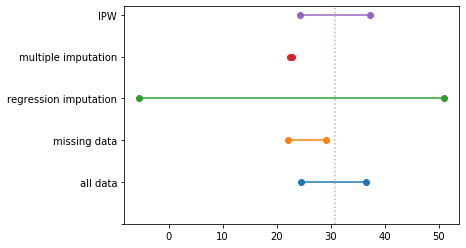

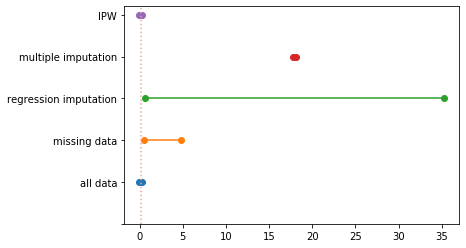

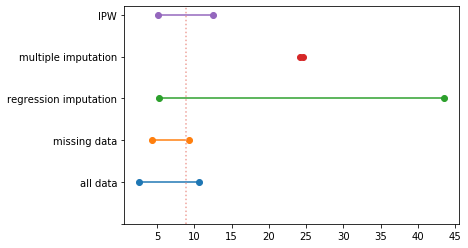

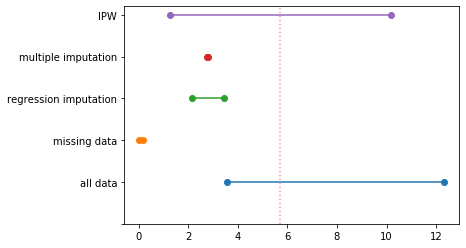

In [299]:
ticks=['','all data', 'missing data', 'regression imputation', 'multiple imputation', 'IPW']
CI = [CI_list, CI_list_mis, CI_list_reg, CI_mult_imput, CI_list_norm_boot]
for i in range(4):
    for j in range(5):
        plt.plot((CI[j][i][0],CI[j][i][1]),(j+1,j+1),'o-')
    plt.yticks(range(len(ticks)),ticks)
    plt.axvline(beta_hat[i], color='#eea29a', linestyle='dotted')
    plt.show()